In [2]:
import numpy as np
import pandas as pd
import os

# 1.1 Call sklearn libraries

# 1.1.1 Split data into train and test data
from sklearn.model_selection import train_test_split

# 1.1.2 PReprocessong:
from sklearn.preprocessing import StandardScaler

# 1.1.3 Import class DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier as dtree

# 1.1.4 To draw decision tree
from sklearn.tree import export_graphviz

# 1.1.5 Import iris
from sklearn.datasets import load_iris

# 1.1.6
# Install as:
#   conda install -c conda-forge python-graphviz 
#   conda install -c anaconda pydot
import graphviz

# 1.1.7
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [6]:
os.getcwd()

'E:\\FORE\\Term 3\\MLP\\MLP-Assignments-main'

In [7]:
dfdf.ing = pd.read_csv("income_evaluation.csv")

In [8]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
# removing redundant spaces from column names
df.columns = list(map(lambda a: a.lstrip(), df.columns))

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
df.shape

(32561, 15)

In [25]:
df[' workclass'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name:  workclass, dtype: int64

There are question marks in the columns instead of 'NaN' or 'None' values. Question marks signalize missing values, that is why they will be removed.

In [26]:
shape0 = df.shape[0]
for column in df.columns:
    df[column].replace(' ?', np.NaN, inplace=True)
df = df.dropna().reset_index().drop(columns=['index'])
shape1 = df.shape[0]
print(str(shape0 - shape1) + ' rows have been removed.')

0 rows have been removed.


In [27]:
income = df[" income"].value_counts()
income

 <=50K    22654
 >50K      7508
Name:  income, dtype: int64

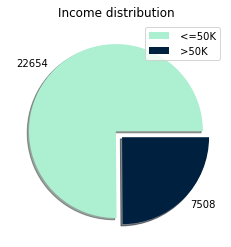

In [28]:
colors = ['#ADEFD1FF', '#00203FFF']
explode = [0, 0.1]
plt.pie(income, labels=income.values, colors=colors, explode = explode, shadow=True)
plt.title('Income distribution')
plt.legend(labels=income.index)

In [30]:
df[' income'].replace([' <=50K',' >50K'],[1,0], inplace=True)

In [16]:
df.dtypes

age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 income            object
dtype: object

Text(0.5, 1.0, 'Correlation Factors Heat Map')

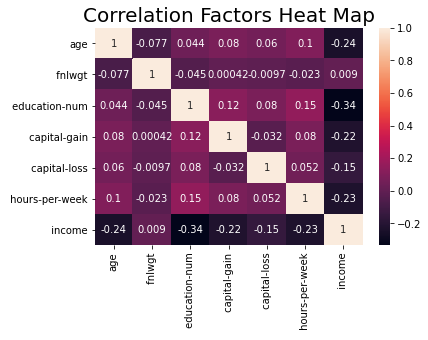

In [31]:
#to see the correaltion between the various variables
sns.heatmap(df.corr(), annot=True).set_title('Correlation Factors Heat Map', color='black', size='20')

In [32]:
df_final = pd.get_dummies(df)
df_final.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [33]:
X = df_final.drop(columns=[' income'])
y = df_final[' income']

In [34]:
# 2.4.1 Instantiate object
ss = StandardScaler()

# 2.4.2 Train object on data
ss.fit(X)

# 2.4.3 Trandform data
X = ss.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [35]:
ct = dtree(
           criterion="entropy",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )
# 5.1
_=ct.fit(X_train,y_train)

In [36]:
y_te = ct.predict(X_test)
np.sum((y_test == y_te))/y_test.size

0.8129075035915571

In [37]:
fi = ct.feature_importances_
fi

array([1.32682787e-01, 1.87499448e-01, 9.98115446e-02, 1.01562069e-01,
       3.45184619e-02, 6.63077226e-02, 5.06395708e-03, 5.61774842e-03,
       7.79122541e-03, 6.19309479e-03, 8.85356117e-03, 4.25833230e-03,
       0.00000000e+00, 0.00000000e+00, 1.12555202e-03, 0.00000000e+00,
       6.72014715e-05, 4.42957281e-05, 9.49469216e-04, 1.61652892e-04,
       2.66938061e-03, 2.51504149e-03, 8.85573176e-04, 4.41493061e-04,
       4.22943669e-03, 8.08425471e-04, 0.00000000e+00, 6.83053079e-04,
       1.71558811e-03, 2.72314781e-03, 9.78786793e-04, 1.89492261e-01,
       1.12760461e-03, 2.02112550e-03, 1.12587804e-03, 1.81898576e-03,
       5.76971431e-03, 0.00000000e+00, 8.33712410e-03, 1.10277471e-02,
       3.19723029e-03, 3.12084867e-03, 4.76465902e-03, 4.05406638e-03,
       0.00000000e+00, 9.24306426e-03, 4.21892122e-03, 9.21742473e-03,
       4.44194083e-03, 5.40371788e-03, 4.07802142e-03, 2.82854163e-03,
       1.11733736e-03, 1.15673727e-03, 1.13726415e-03, 2.17150428e-03,
      

In [38]:
list(zip(df.columns, fi))

[('age', 0.13268278667730804),
 (' workclass', 0.1874994477145917),
 (' fnlwgt', 0.09981154463817246),
 (' education', 0.10156206905989776),
 (' education-num', 0.034518461895292014),
 (' marital-status', 0.06630772260848795),
 (' occupation', 0.005063957083903041),
 (' relationship', 0.005617748421352957),
 (' race', 0.007791225408858424),
 (' sex', 0.00619309479189016),
 (' capital-gain', 0.008853561172580024),
 (' capital-loss', 0.004258332299689775),
 (' hours-per-week', 0.0),
 (' native-country', 0.0),
 (' income', 0.0011255520212585335)]

In [39]:
from sklearn.ensemble import RandomForestClassifier # using random forest 

In [40]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [41]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8488230743728589


When using decision tree , the accuracy was 80% , while using the Random Forest Classifier accuracy has increased to 85%